In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
import spacy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Data Exploration and Preprocessing/Preparation

In [3]:
df = pd.read_csv('cyberbullying_tweets.csv')

In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [6]:
'''Function to clean the tweets for futher analyses'''
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stopwords.extend(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 
                      've', 'u', 'ur', 'don', 't', 's'])
def clean_tweet(tweet):
    clean_text = re.sub(TEXT_CLEANING_RE, ' ', tweet)
    clean_text = clean_text.lower()
    clean_text = ' '.join([word for word in nltk.word_tokenize(clean_text) 
                           if word not in stopwords])
    return clean_text

In [7]:
tweet = '''Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc'''
print(clean_tweet(tweet))

aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc


In [8]:
df['clean_tweets'] = df['tweet_text'].apply(clean_tweet)

In [9]:
df.head()

,tweet_text,cyberbullying_type,clean_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...


In [10]:
df.to_csv('processed_tweets.csv', index=False)

In [11]:
'''Word Lemmatization'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_tweets(tweet):
    lemmatized_tweets = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split(' ')])
    return lemmatized_tweets

In [12]:
df['lemmatized_tweets'] = df['clean_tweets'].apply(lemmatize_tweets)

In [13]:
df.head()

,tweet_text,cyberbullying_type,clean_tweets,lemmatized_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious,word katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,aussietv white theblock imacelebrityau today s...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads concerned another angry dud...,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...,isi account pretending kurdish account like is...


In [14]:
# WordCloud Analysis by type of Cyberbullying

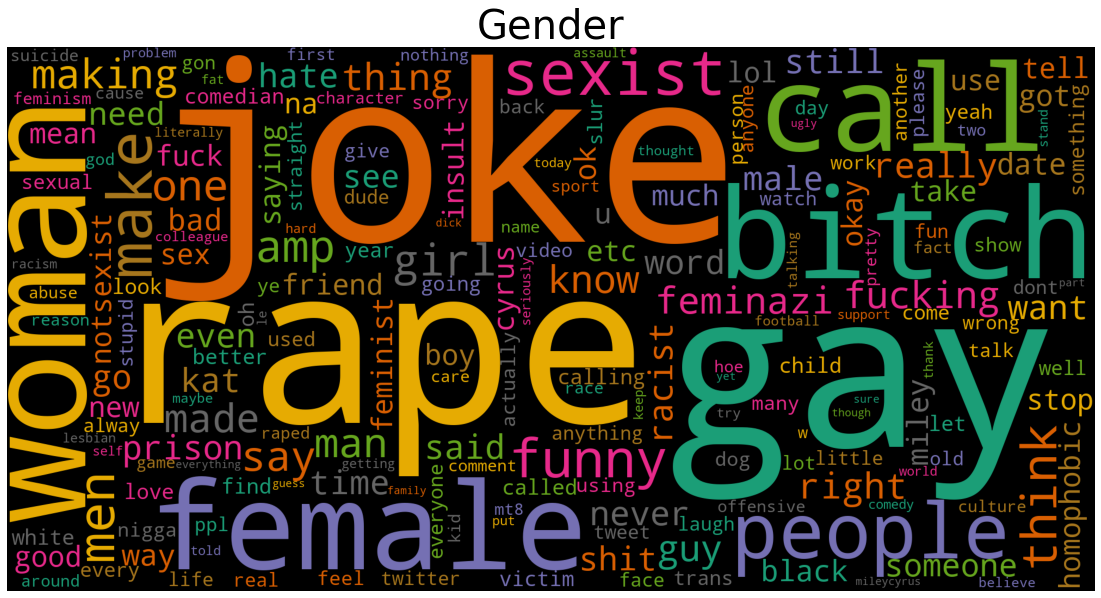

In [15]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

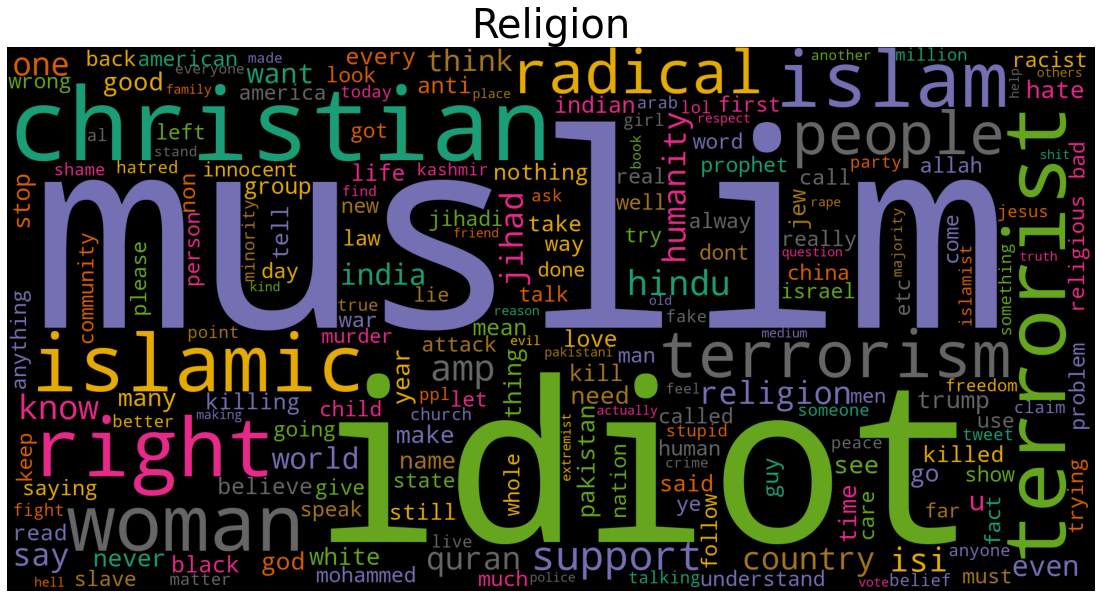

In [16]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='religion']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud1)

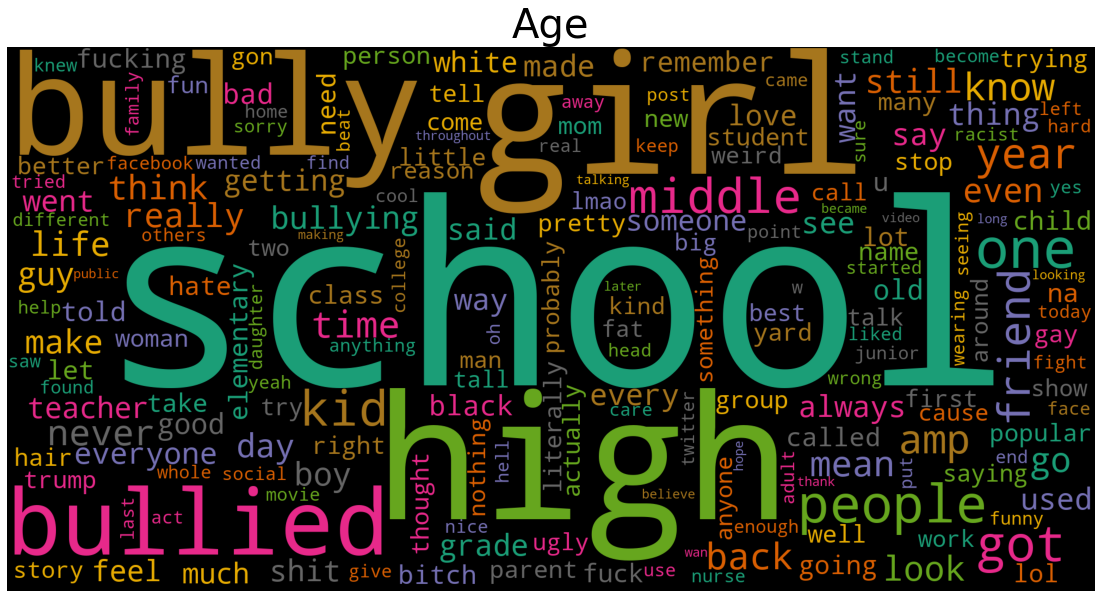

In [17]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='age']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False, 
                 width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud1)

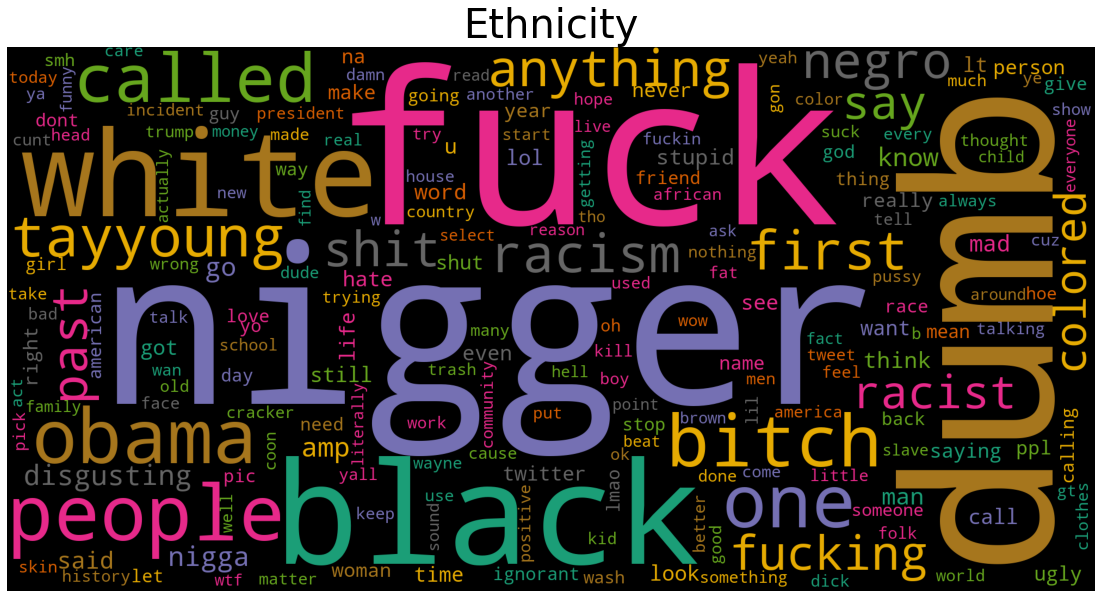

In [18]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='ethnicity']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud1)

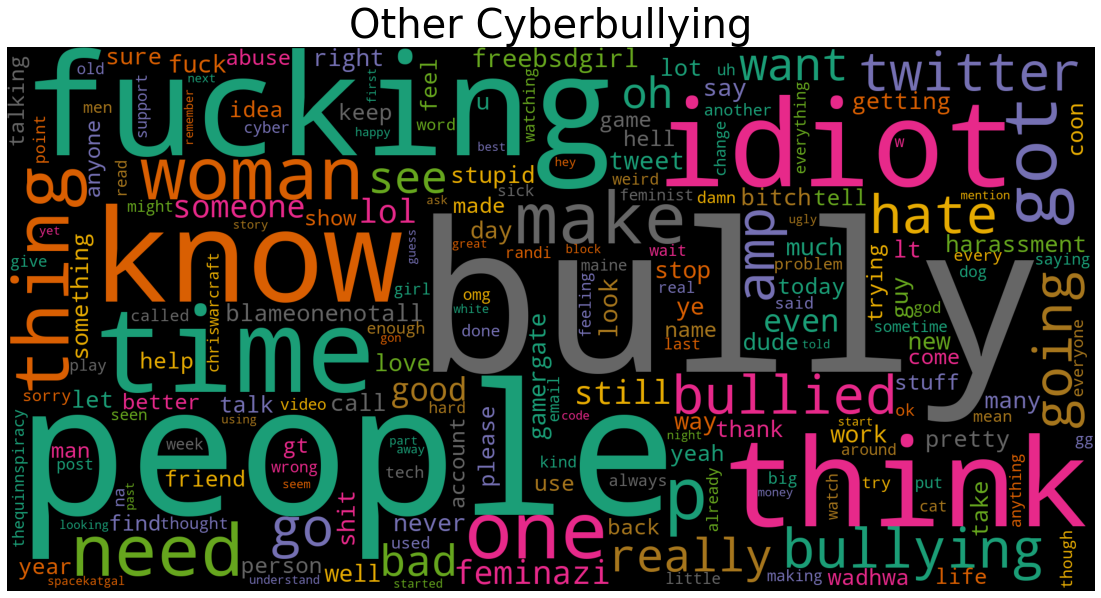

In [19]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='other_cyberbullying']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Other Cyberbullying",fontsize=40)
plt.imshow(cloud1)

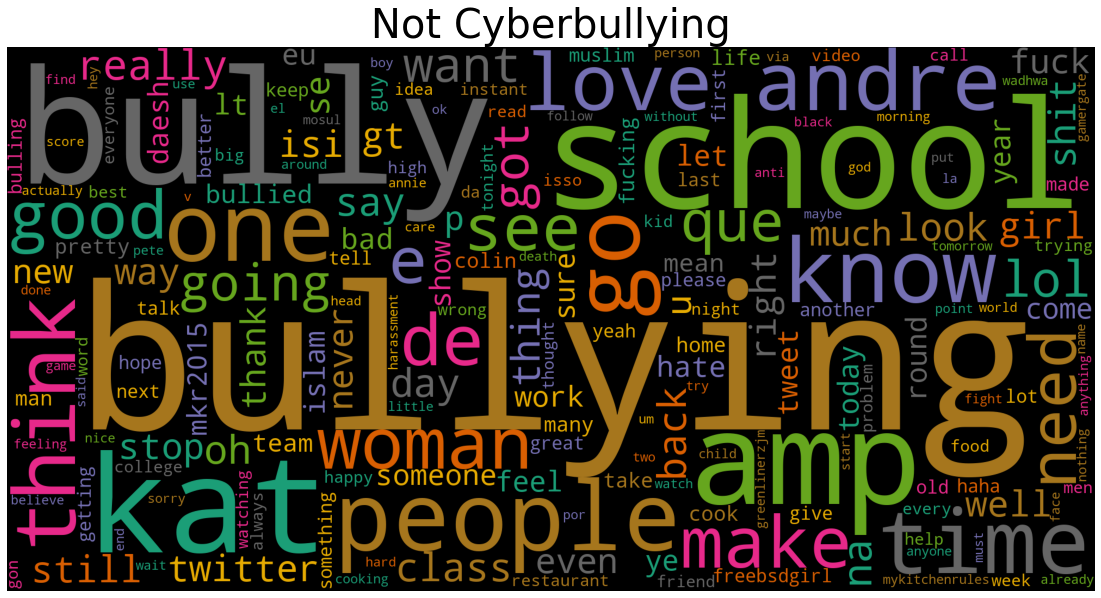

In [20]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='not_cyberbullying']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Not Cyberbullying",fontsize=40)
plt.imshow(cloud1)